In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 343M/346M [00:01<00:00, 261MB/s]
100% 346M/346M [00:01<00:00, 245MB/s]


In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files



In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sivaji007","key":"5decf3037a5d2bd40411e30bea0a0455"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb
import tensorflow as tf
import keras
import cv2
import os
from keras.callbacks import EarlyStopping

In [36]:
train_path  = '/content/seg_train/seg_train'
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path + '/' +folder +'/*.jpg'))
    print(f'for training data, found {len(images)} in folder {folder}')


for training data, found 2271 in folder forest
for training data, found 2512 in folder mountain
for training data, found 2404 in folder glacier
for training data, found 2191 in folder buildings
for training data, found 2274 in folder sea
for training data, found 2382 in folder street


In [39]:
code={'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
def getname(n):

    for k,v in code.items():
        if v==n:
            return k

In [40]:
train_path  = '/content/seg_train/seg_train'
x_train=[]
y_train=[]
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path + '/'+ folder +'/*.jpg'))
    for img in images:
        img=cv2.imread(img)
        img=cv2.resize(img,(100,100))
        x_train.append(img)
        y_train.append(code[folder])

In [48]:
x_train

[array([[[ 34,  50,  49],
         [ 53,  72,  69],
         [ 43,  63,  53],
         ...,
         [158, 192, 178],
         [111, 148, 131],
         [ 92, 136, 114]],
 
        [[ 43,  60,  62],
         [ 66,  85,  83],
         [ 53,  70,  65],
         ...,
         [103, 141, 125],
         [ 92, 130, 111],
         [104, 138, 117]],
 
        [[ 38,  55,  55],
         [ 35,  51,  51],
         [ 43,  56,  61],
         ...,
         [ 94, 130, 111],
         [113, 149, 130],
         [118, 152, 128]],
 
        ...,
 
        [[ 41,  61,  81],
         [ 17,  31,  55],
         [ 44,  55,  73],
         ...,
         [139, 199, 233],
         [135, 189, 226],
         [106, 156, 195]],
 
        [[ 29,  45,  75],
         [ 24,  34,  72],
         [ 16,  27,  64],
         ...,
         [102, 140, 182],
         [123, 163, 206],
         [ 99, 139, 185]],
 
        [[ 37,  37,  77],
         [ 50,  61, 111],
         [ 62,  82, 132],
         ...,
         [119, 133, 174],
  

In [42]:
test_path  = '/content/seg_test/seg_test'

x_test=[]
y_test=[]
for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path + '/' + folder +'/*.jpg'))
    for img in images:
        img=cv2.imread(img)
        img=cv2.resize(img,(100,100))
        x_test.append(img)
        y_test.append(code[folder])

In [43]:
pred_path  = '/content/seg_pred/seg_pred'
x_pred=[]
images=gb.glob(pathname=str(pred_path + '/' +'/*.jpg'))
for img in images:
    img=cv2.imread(img)
    img=cv2.resize(img,(100,100))
    x_pred.append(img)

In [49]:
x_train=np.array(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)

x_pred=np.array(x_pred)

In [50]:

model=keras.models.Sequential(
[
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense( 6,activation='softmax')
])

In [51]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
model.compile(optimizer=tf.keras.optimizers.Adam() ,loss='SparseCategoricalCrossentropy' , metrics=['accuracy'])
final_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=130,callbacks=[es],verbose=1)

Epoch 1/10
108/108 [==============================] - 92s 616ms/step - loss: 1.5690 - accuracy: 0.4629 - val_loss: 1.0286 - val_accuracy: 0.5797
Epoch 2/10
108/108 [==============================] - 50s 467ms/step - loss: 0.9527 - accuracy: 0.6149 - val_loss: 0.8870 - val_accuracy: 0.6663
Epoch 3/10
108/108 [==============================] - 48s 447ms/step - loss: 0.8108 - accuracy: 0.6903 - val_loss: 0.8147 - val_accuracy: 0.6877
Epoch 4/10
108/108 [==============================] - 50s 467ms/step - loss: 0.6974 - accuracy: 0.7435 - val_loss: 0.6245 - val_accuracy: 0.7790
Epoch 5/10
108/108 [==============================] - 50s 466ms/step - loss: 0.6214 - accuracy: 0.7773 - val_loss: 0.5878 - val_accuracy: 0.7887
Epoch 6/10
108/108 [==============================] - 50s 464ms/step - loss: 0.5803 - accuracy: 0.7920 - val_loss: 0.5711 - val_accuracy: 0.7880
Epoch 7/10
108/108 [==============================] - 50s 466ms/step - loss: 0.5283 - accuracy: 0.8091 - val_loss: 0.6130 - val_ac

In [54]:
y_pred=model.predict(x_test)

94/94 [==============================] - 8s 69ms/step


In [55]:
y_pred=np.argmax(y_pred,axis=1)

In [59]:
class_names=['buildings' ,'forest','glacier','mountain','sea','street']

In [61]:
report = classification_report(y_test, y_pred, target_names=['buildings' ,'forest','glacier','mountain','sea','street'])

In [63]:
print(report)

              precision    recall  f1-score   support

   buildings       0.82      0.76      0.79       437
      forest       0.94      0.96      0.95       474
     glacier       0.77      0.75      0.76       553
    mountain       0.76      0.79      0.77       525
         sea       0.80      0.79      0.80       510
      street       0.82      0.87      0.85       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



# **prediction**

In [72]:
y_newpred=model.predict(x_pred)

229/229 [==============================] - 12s 51ms/step


In [74]:
y_probs=model.predict(x_pred)
y_pred=y_probs.argmax(axis=1)
y_percent=np.amax(y_probs,axis=1)

229/229 [==============================] - 11s 50ms/step


In [70]:
code

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [71]:
def getname(n):

    for k,v in code.items():
        if v==n:
            return k

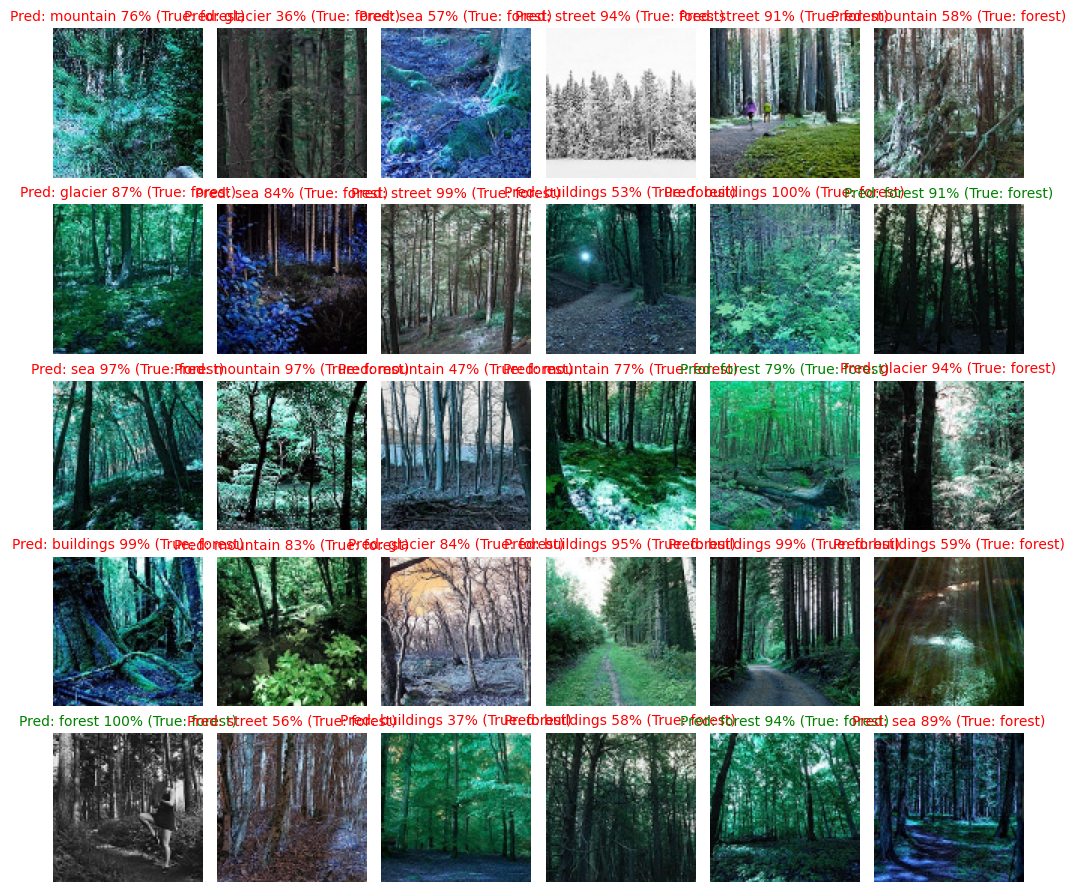

In [75]:
plt.figure(figsize=(10,9))
plotnumber=1

for i in range(1,31):
    if plotnumber <=30:
        ax=plt.subplot(5,6,plotnumber)
        plt.imshow(x_test[i],cmap='binary')
        plt.axis('off')
        plt.title('Pred: ' + getname(y_pred[i]) +' '+ str(round(y_percent[i]*100)) +'% (True: ' + getname(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred[i]==y_test[i] else 'red')})
        plotnumber+=1
plt.tight_layout()
plt.show()

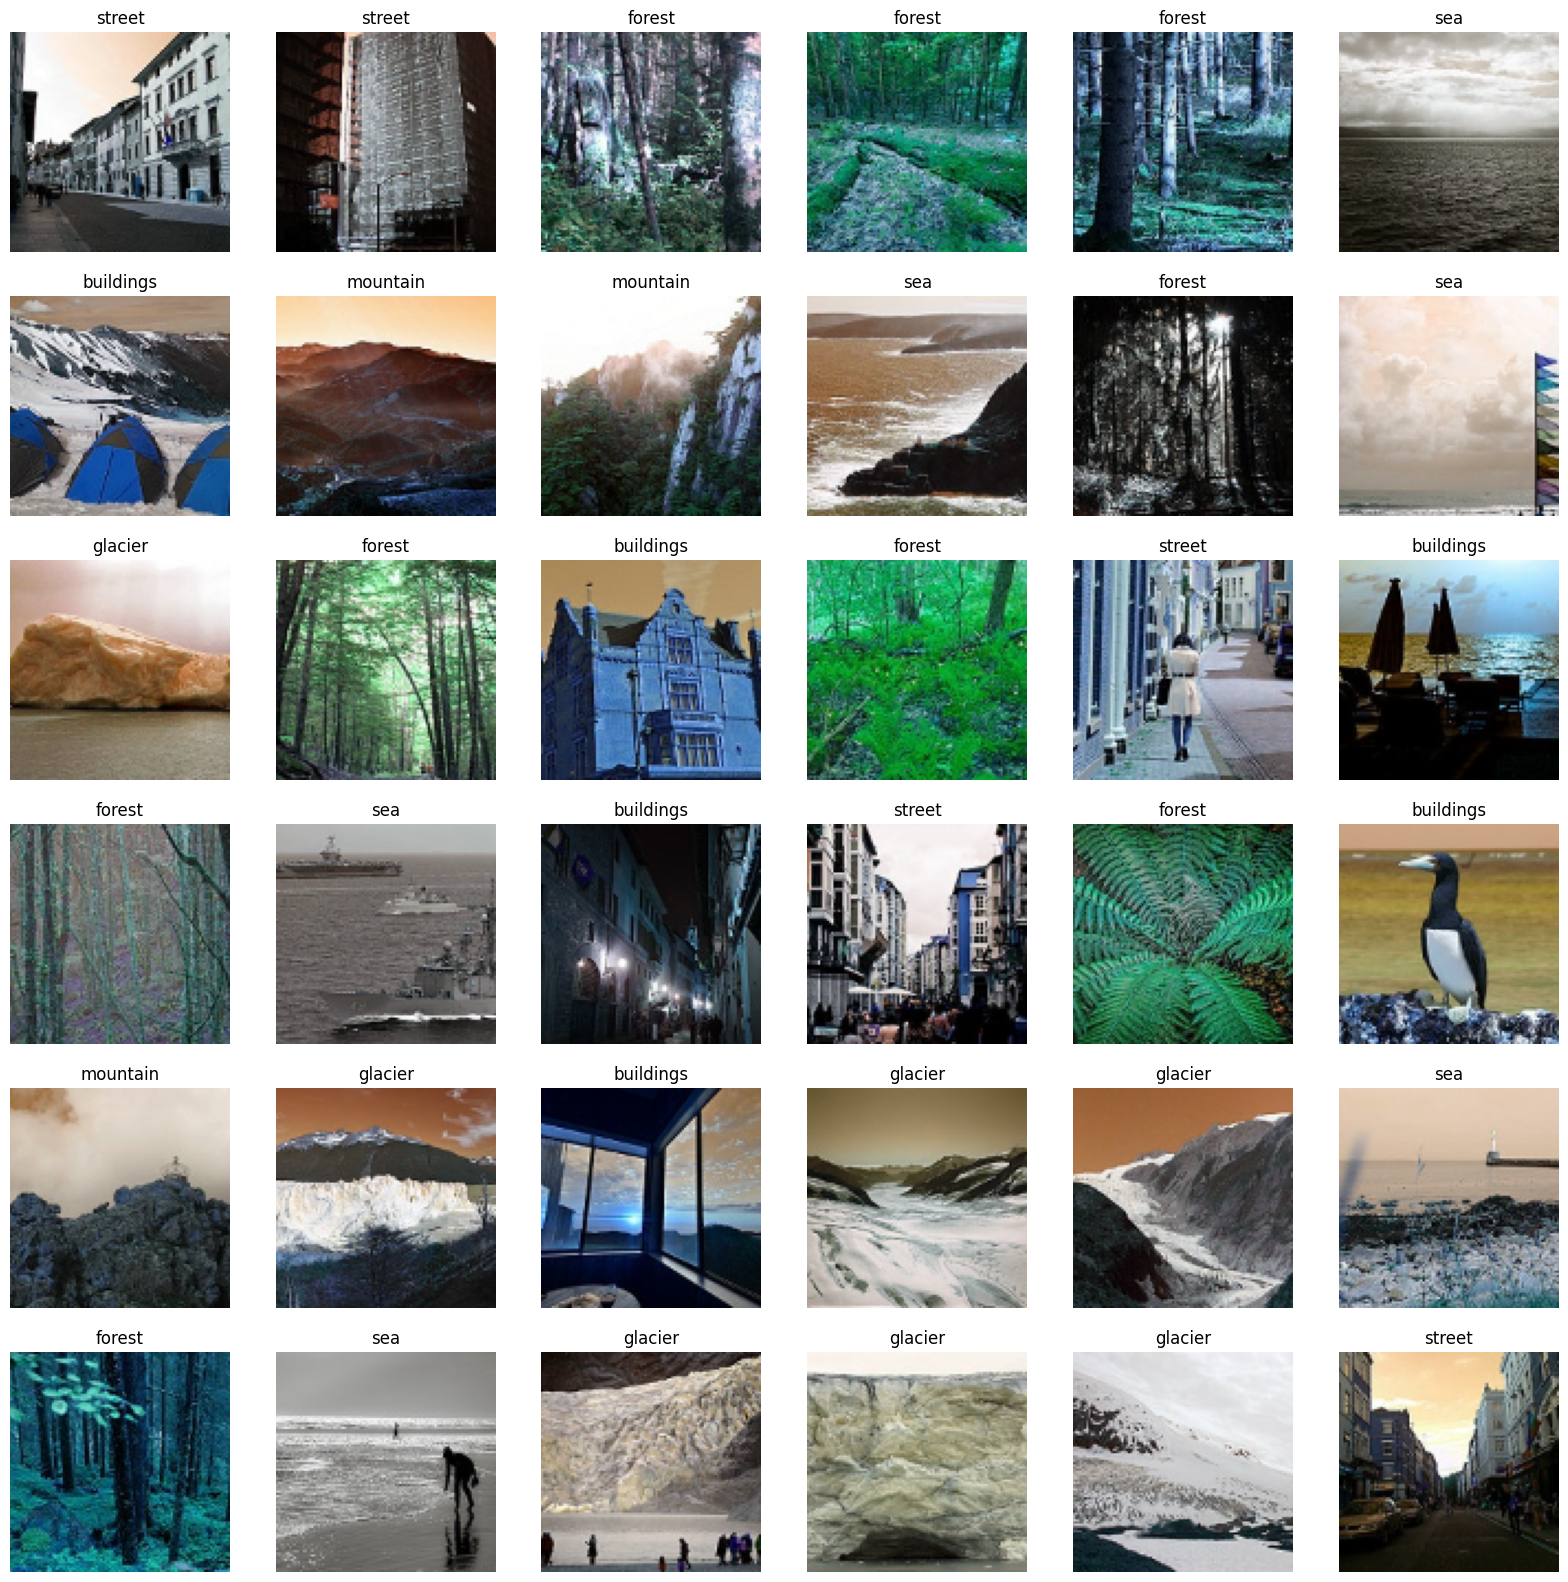

In [76]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(x_pred), 36))):
    plt.subplot(6, 6, n + 1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(getname(y_pred[i]))

In [77]:
model.evaluate(x_test,y_test)

94/94 [==============================] - 5s 52ms/step - loss: 0.5077 - accuracy: 0.8177


[0.5076563358306885, 0.8176666498184204]

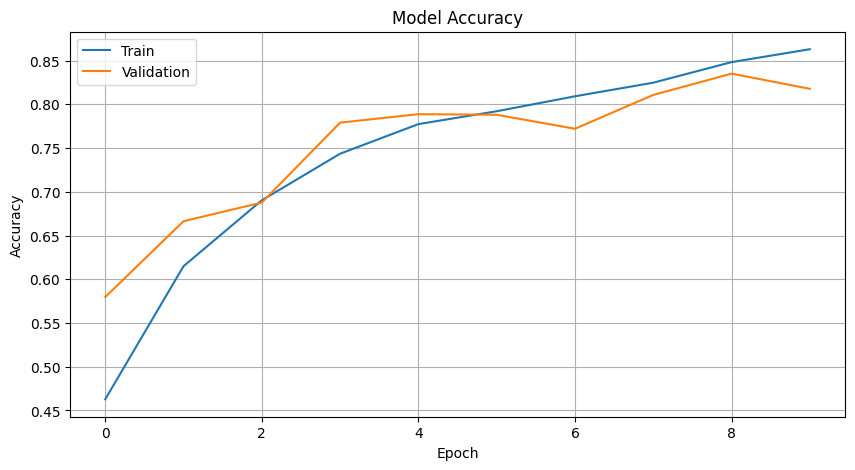

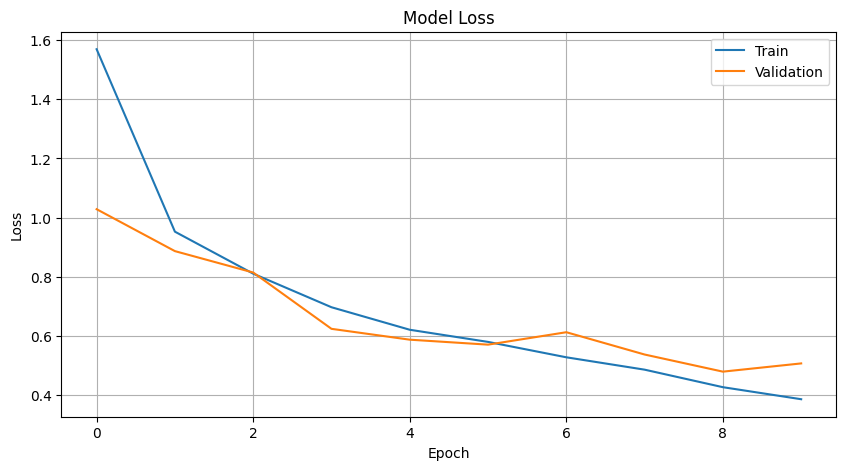

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

In [58]:
model.save("demo.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
